In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [2]:
basic = pd.read_csv('nba_team_stats.csv')
basic=basic.dropna()
advanced = pd.read_csv('advanced_stats.csv')
standings=pd.read_csv('standings.csv')
machine_stats = pd.read_csv('nba_team_stats_machine_order.csv')
#all statistics except for standing information is on a per game basist

In [3]:
print(basic)

      Rk                     Team   G     MP    FG   FGA    FG%    3P   3PA  \
0    1.0  Minnesota Timberwolves*  82  241.2  41.6  91.0  0.457  14.8  41.3   
1    2.0       Memphis Grizzlies*  82  241.2  43.5  94.4  0.461  11.5  32.7   
2    3.0         Milwaukee Bucks*  82  240.9  41.8  89.4  0.468  14.1  38.4   
3    4.0        Charlotte Hornets  82  242.4  42.8  91.4  0.468  13.9  38.2   
4    5.0            Phoenix Suns*  82  240.6  43.7  90.1  0.485  11.6  31.9   
5    6.0           Atlanta Hawks*  82  240.3  41.5  88.3  0.470  12.9  34.4   
6    7.0               Utah Jazz*  82  240.6  40.6  86.2  0.471  14.5  40.3   
7    8.0        San Antonio Spurs  82  241.5  43.2  92.7  0.467  11.3  32.0   
8    9.0           Brooklyn Nets*  82  240.9  42.0  88.4  0.475  11.5  31.7   
9   10.0          Denver Nuggets*  82  241.5  41.7  86.3  0.483  12.7  35.9   
10  11.0       Los Angeles Lakers  82  243.7  41.6  88.8  0.469  12.0  34.5   
11  12.0          Boston Celtics*  82  242.7  40.7  

In [4]:
advanced = advanced.iloc[:-1,:]
advanced = advanced.iloc[1:, :]

print(advanced)

   Unnamed: 0               Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
1           1          Boston Celtics*       26.1         51         31   
2           2            Phoenix Suns*       27.5         64         18   
3           3               Utah Jazz*       29.3         49         33   
4           4       Memphis Grizzlies*       24.0         56         26   
5           5   Golden State Warriors*       27.6         53         29   
6           6              Miami Heat*       28.2         53         29   
7           7        Dallas Mavericks*       26.7         52         30   
8           8         Milwaukee Bucks*       28.5         51         31   
9           9      Philadelphia 76ers*       26.8         51         31   
10         10  Minnesota Timberwolves*       24.2         46         36   
11         11          Denver Nuggets*       27.7         48         34   
12         12         Toronto Raptors*       24.8         48         34   
13         13      Clevel

In [5]:
#print(standings)
wins = [64, 56, 52, 52, 53, 51, 51, 51, 49, 48, 48, 46, 46, 44, 44, 43, 43, 42, 37, 36, 35, 34, 33, 30, 27, 25, 24, 23, 22, 20]

In [6]:
print(standings.head())

   Unnamed: 0             Unnamed: 1  Unnamed: 2  Place Place.1 Conference  \
0           1           Phoenix Suns          64   32-9    32-9       25-5   
1           2      Memphis Grizzlies          56  30-11   26-15      20-10   
2           3  Golden State Warriors          53  31-10   22-19      20-10   
3           4             Miami Heat          53  29-12   24-17      35-17   
4           5       Dallas Mavericks          52  29-12   23-18      16-14   

  Conference.1 Division Division.1 Division.2  ... All-Star.1 Margin Margin.1  \
0        39-13    2-Aug      1-Sep      2-Aug  ...       16-8  2-Jun     37-9   
1        36-16    4-Jun      1-Sep      5-May  ...       15-7  3-May    33-17   
2        33-19    4-Jun      2-Aug      4-Jun  ...     12-Nov  5-Jun    34-10   
3        18-12    8-Oct      6-Dec       13-3  ...       15-8  6-Mar    31-15   
4        36-16    4-Jun      4-Jun      6-Apr  ...       17-6  5-Jul    27-14   

   Month Month.1 Month.2 Month.3 Month.4 Mon

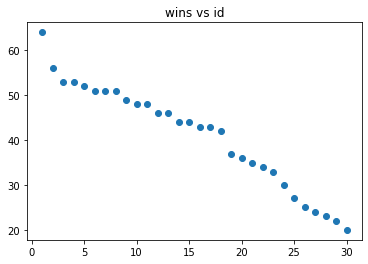

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(standings['Unnamed: 0'], standings['Unnamed: 2'])
plt.title('wins vs id')
plt.show()
plt.clf()

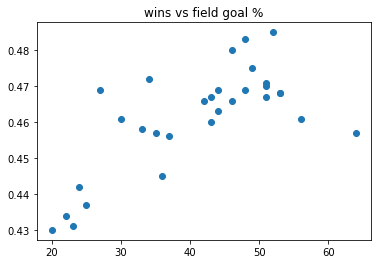

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(standings['Unnamed: 2'], basic['FG%'])
plt.title('wins vs field goal %')
plt.show()
plt.clf()

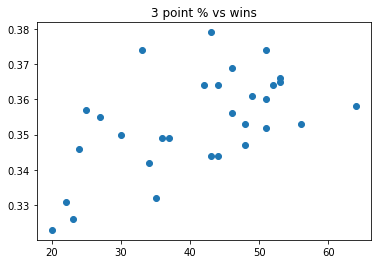

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(standings['Unnamed: 2'], basic['3P%'])
plt.title('3 point % vs wins')
plt.show()
plt.clf()

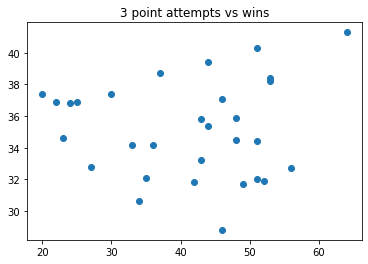

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(standings['Unnamed: 2'], basic['3PA'])
plt.title('3 point attempts vs wins')
plt.show()
plt.clf()

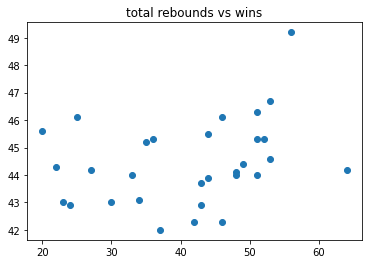

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(standings['Unnamed: 2'], basic['TRB'])
plt.title('total rebounds vs wins')
plt.show()
plt.clf()

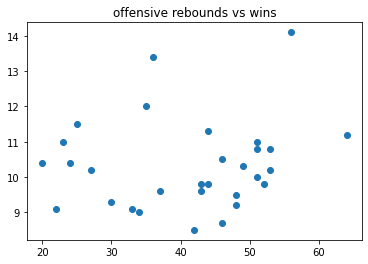

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(standings['Unnamed: 2'], basic['ORB'])
plt.title('offensive rebounds vs wins')
plt.show()
plt.clf()

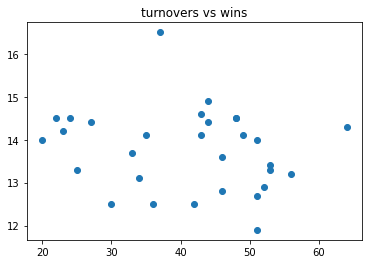

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(standings['Unnamed: 2'], basic['TOV'])
plt.title('turnovers vs wins')
plt.show()
plt.clf()

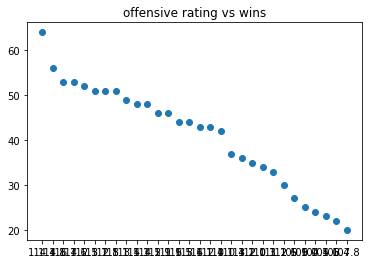

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(advanced['Unnamed: 10'], standings['Unnamed: 2'])
plt.title('offensive rating vs wins')
plt.show()
plt.clf()
#need to declutter axis labels if I decide to use this, might just use advanced for machine learning

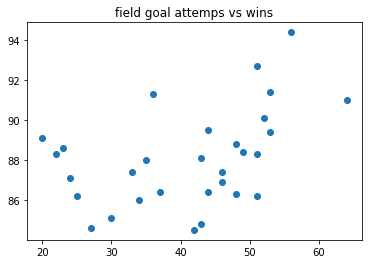

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(standings['Unnamed: 2'], basic.FGA)
plt.title('field goal attemps vs wins')
plt.show()
plt.clf()

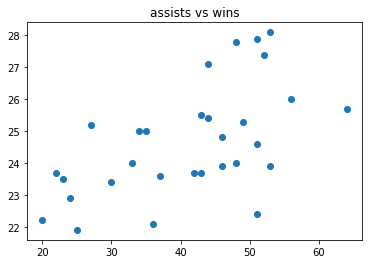

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(standings['Unnamed: 2'], basic.AST)
plt.title('assists vs wins')
plt.show()
plt.clf()

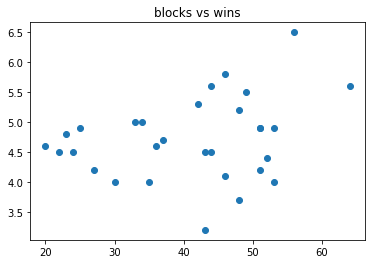

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(standings['Unnamed: 2'], basic.BLK)
plt.title('blocks vs wins')
plt.show()
plt.clf()

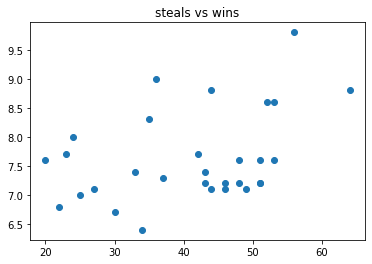

<Figure size 432x288 with 0 Axes>

In [18]:
plt.scatter(standings['Unnamed: 2'], basic.STL)
plt.title('steals vs wins')
plt.show()
plt.clf()

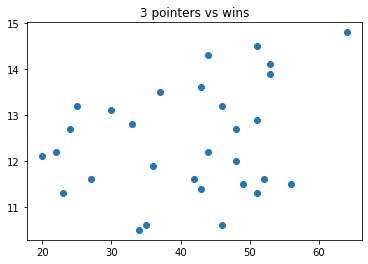

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(standings['Unnamed: 2'], basic['3P'])
plt.title('3 pointers vs wins')
plt.show()
plt.clf()

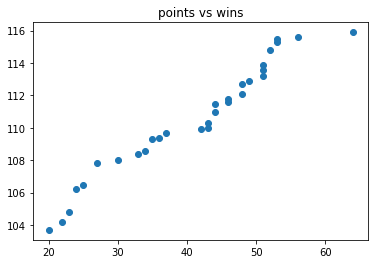

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(standings['Unnamed: 2'], basic.PTS)
plt.title('points vs wins')
plt.show()
plt.clf()

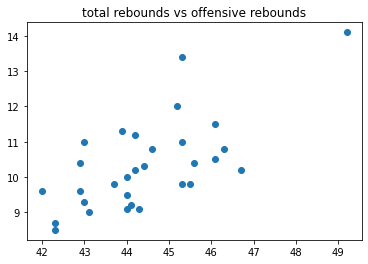

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(basic.TRB, basic.ORB)
plt.title('total rebounds vs offensive rebounds')
plt.show()
plt.clf()

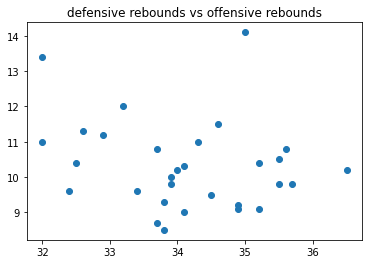

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(basic.DRB, basic.ORB)
plt.title('defensive rebounds vs offensive rebounds')
plt.show()
plt.clf()

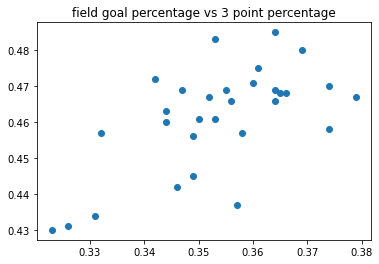

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(basic['3P%'], basic['FG%'])
plt.title('field goal percentage vs 3 point percentage')
plt.show()
plt.clf()

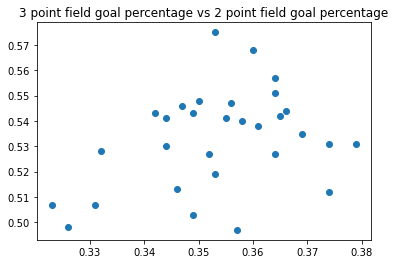

<Figure size 432x288 with 0 Axes>

In [24]:
plt.scatter(basic['3P%'], basic['2P%'])
plt.title('3 point field goal percentage vs 2 point field goal percentage')
plt.show()
plt.clf()

In [25]:
machine_stats = machine_stats.iloc[:-1,:]
x = machine_stats['PTS']
x=pd.array(x)
x=x.reshape(-1,1)
y = standings['Unnamed: 2']
y=pd.array(y)
y=y.reshape(-1,1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .6, random_state = 1)

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))
print(model.predict(x_test))

0.258934305938212
[[45.08057647]
 [37.01256018]
 [37.30070362]
 [39.89399457]
 [50.26715838]
 [38.16513393]
 [28.08011357]
 [39.02956425]
 [32.69040859]
 [34.9955561 ]
 [34.41926923]
 [33.26669547]
 [41.91099864]
 [28.94454388]
 [54.8774534 ]
 [43.35171584]
 [54.30116652]
 [38.74142081]]


In [38]:
x2= machine_stats['FG%']
x2=pd.array(x2)
x2=x2.reshape(-1,1)
model2=LinearRegression()
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y, test_size = .6, random_state = 1)
model2.fit(x_train2, y_train2)
print(model2.score(x_test2, y_test2))
print(model2.predict(x_test2))

0.14842455502522256
[[47.00867844]
 [39.76720463]
 [32.52573082]
 [41.57757308]
 [47.61213459]
 [39.16374848]
 [30.71536236]
 [45.80176614]
 [47.00867844]
 [48.81904689]
 [40.37066078]
 [42.18102923]
 [47.00867844]
 [27.69808161]
 [46.40522229]
 [43.38794153]
 [46.40522229]
 [45.19830999]]


In [44]:
x3 = machine_stats['TRB']
x3=pd.array(x3)
x3=x3.reshape(-1,1)
model3=LinearRegression()
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y, test_size = .6, random_state = 1)
model3.fit(x_train3, y_train3)
print(model3.score(x_test3, y_test3))
print(model3.predict(x_test3))

-0.06261800931982475
[[39.57479028]
 [43.15520515]
 [43.45357306]
 [36.29274331]
 [39.57479028]
 [33.60743216]
 [36.29274331]
 [38.67968656]
 [40.17152609]
 [36.88947912]
 [39.57479028]
 [36.59111122]
 [44.05030887]
 [45.84051631]
 [47.63072375]
 [39.27642237]
 [41.36499772]
 [34.50253587]]


In [45]:
x4 = machine_stats['FT%']
x4=pd.array(x4)
x4=x4.reshape(-1,1)
model4=LinearRegression()
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4,y, test_size = .6, random_state = 1)
model3.fit(x_train4, y_train4)
print(model3.score(x_test4, y_test4))
print(model3.predict(x_test4))

0.05589040667564549
[[38.96239981]
 [43.09026403]
 [40.91770391]
 [41.56947195]
 [44.75589345]
 [37.58644507]
 [40.99012258]
 [44.46621876]
 [40.99012258]
 [42.655752  ]
 [43.37993871]
 [41.78672796]
 [41.64189062]
 [39.83142386]
 [42.14882131]
 [41.56947195]
 [39.54174917]
 [45.40766148]]


In [ ]:
#expand on the problem of machine learning for sports statistics